In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# nltk.download()

## Load transcript file and concatenate
There is only one part for the Debate 2

In [2]:
transcript = pd.read_csv("dataset/parsed_transcript_2.csv")
transcript.head()


,name,time,contents
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...


## Use VaderSentiment Package
VaderSentiment gives the score for positivity, negativity, and neutral.
Also, The compound score is computed by summing the score of each word and then normalizing.
We define a function called `vader_polarity` to convert the positivity/negativity/neutral score to ternary value.
-1 if negativity dominates, 0 if neutral dominates, and 1 if positivity dominates.
Also, this function returns a compound score as well.

In [3]:
analyser = SentimentIntensityAnalyzer()

def vader_polarity(text):
    """
    Transform the output to a -1/0/1
    """
    score = analyser.polarity_scores(text)
    if max(score.values()) == score['pos']:
        return 1, score['compound']
    elif max(score.values()) == score['neu']:
        return 0, score['compound']
    else:
        return -1, score['compound']



## Save computed scores to the new columns

In [4]:
for index, row in transcript.iterrows():
    text = row['contents']
    transcript.loc[index, 'scores'], transcript.loc[index, 'compound_scores'] = vader_polarity(text)

In [5]:
transcript.head()

,name,time,contents,scores,compound_scores
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo...",-1.0,0.9969
1,Donald Trump,07:37,How are you doing? How are you?,0.0,0.0000
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...,0.0,0.6997
3,Kristen Welker,08:27,The goal is for you to hear each other and for...,0.0,-0.7850
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...,0.0,-0.6249


## Data analysis with the visualization

In [6]:
%matplotlib inline
transcript = transcript.set_index('time')

Text(0, 0.5, 'Count')

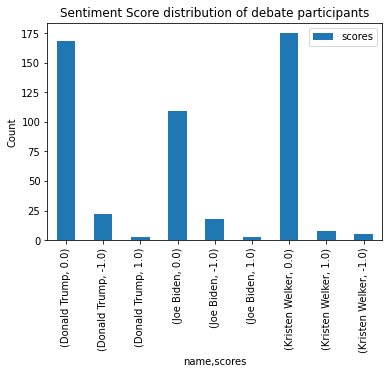

In [7]:
transcript.groupby('name')['scores'].value_counts().plot(kind='bar',
                                                         legend=True)
plt.title('Sentiment Score distribution of debate participants')
plt.ylabel('Count')

Text(0, 0.5, 'Sentiment Polarity')

<Figure size 3000x2000 with 0 Axes>

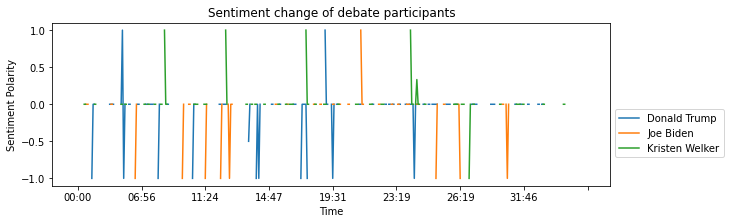

In [8]:
fig = plt.figure(dpi=500)
pd.pivot_table(transcript.reset_index(),
               index='time', columns='name', values='scores'
              ).plot(figsize=(10,3), subplots=False, legend=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('Sentiment change of debate participants')
plt.xlabel('Time')
plt.ylabel('Sentiment Polarity')

Text(0, 0.5, 'Compound Score')

<Figure size 432x288 with 0 Axes>

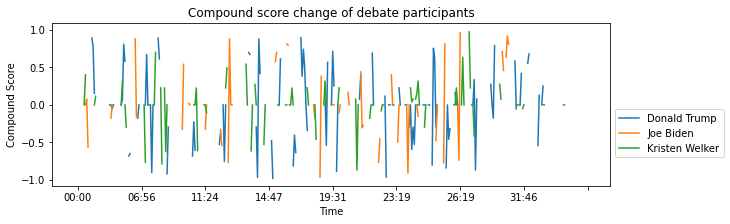

In [9]:
fig = plt.figure()
pd.pivot_table(transcript.reset_index(),
               index='time', columns='name', values='compound_scores'
              ).plot(figsize=(10,3), subplots=False, legend=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('Compound score change of debate participants')
plt.xlabel('Time')
plt.ylabel('Compound Score')

Text(0, 0.5, 'Compound Score')

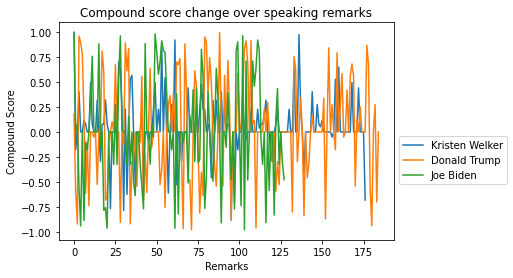

In [13]:
fig = plt.figure()
compound_score_pivot = pd.pivot_table(transcript.reset_index(), index='time', columns='name', values='compound_scores')
kw = compound_score_pivot['Kristen Welker'].dropna()
plt.plot(kw.to_list())
dt = compound_score_pivot['Donald Trump'].dropna()
plt.plot(dt.to_list())
jb = compound_score_pivot['Joe Biden'].dropna()
plt.plot(jb.to_list())
plt.legend(['Kristen Welker', 'Donald Trump', 'Joe Biden'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('Compound score change over speaking remarks')
plt.xlabel('Remarks')
plt.ylabel('Compound Score')

Text(0, 0.5, 'Compound Score')

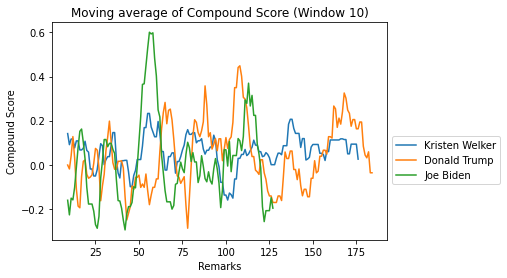

In [14]:
fig = plt.figure()
plt.plot(kw.rolling(window=10).mean().to_list())
plt.plot(dt.rolling(window=10).mean().to_list())
plt.plot(jb.rolling(window=10).mean().to_list())
plt.legend(['Kristen Welker', 'Donald Trump', 'Joe Biden'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('Moving average of Compound Score (Window 10)')
plt.xlabel('Remarks')
plt.ylabel('Compound Score')

## Find correlation of sentimental changes between two candidates
We can conclude that the sentiment between two candidates has a weak correlation.

In [15]:
print(dt.rolling(window=10).mean().corr(jb.rolling(window=10).mean()))
print(dt.rolling(window=10).mean().corr(kw.rolling(window=10).mean()))

-0.06638794906470011
0.0002959161459437851
